In [1]:
from datetime import datetime as dt
time_start = dt.today()

import pandas as pd
#import main_module
%run main_module.ipynb

%matplotlib inline

## Чтение и подготовка

In [3]:
#type_h = 'HE3BP'
type_h = 'HE3'
testing_record = record(r"sig_3.txt", holter_type=type_h, amplitude_convert = 330)

len: 436224


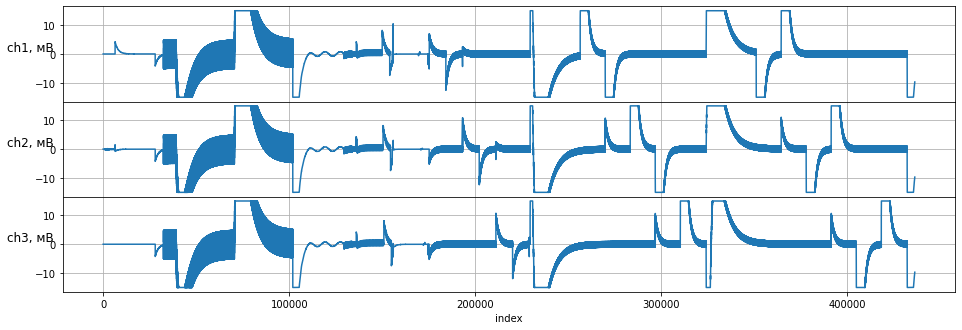

In [4]:
testing_record.plot()

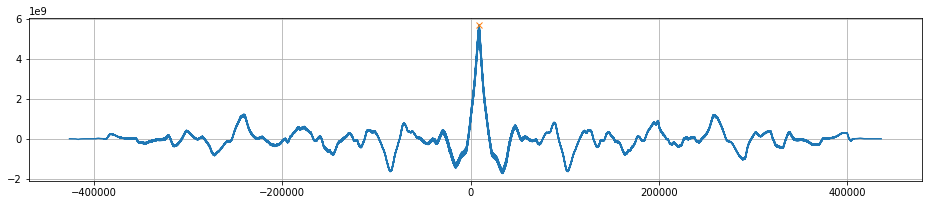

index lag: 8904


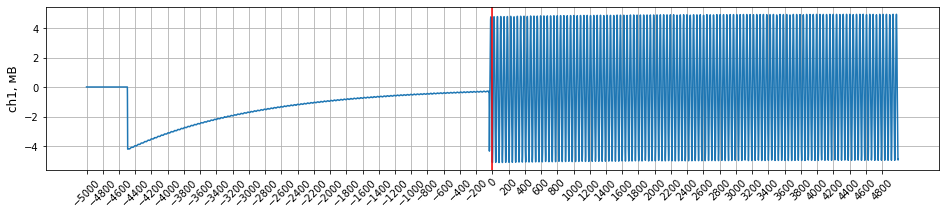

In [5]:
testing_record.find_index_lag(offset=-150, plot_corr=True)
print('index lag:' ,testing_record.index_lag)
testing_record.calibrate_index_lag()
testing_record.split_channels()

## Тесты

In [8]:
tests_rezult_pd = pd.DataFrame(columns=['Test_name','Passed_test' ,'Returned_values', 'Spikes'])

Максимальный размах записи:    0.013 мВ
Максимально допустимый размах: 0.02 мВ
[0.013, 0.013, 0.009]


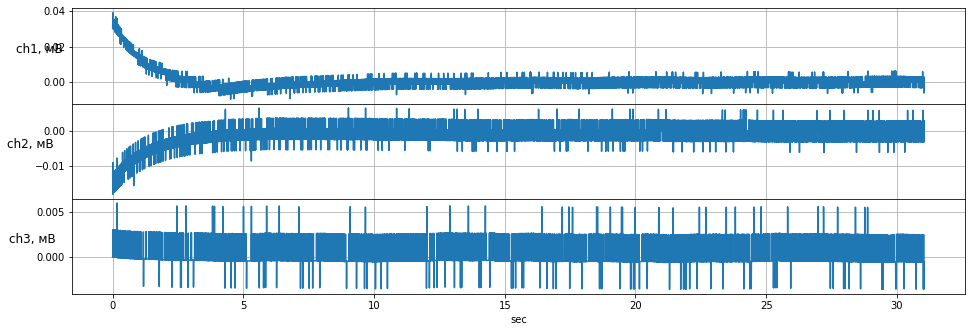

In [9]:
values = nose_test(testing_record, max_nose = 0.02, filtred=True)
passed_test = max(values)<0.02
tests_rezult_pd.loc[0] = [ 'Nose test', passed_test  , values, pd.NA ]

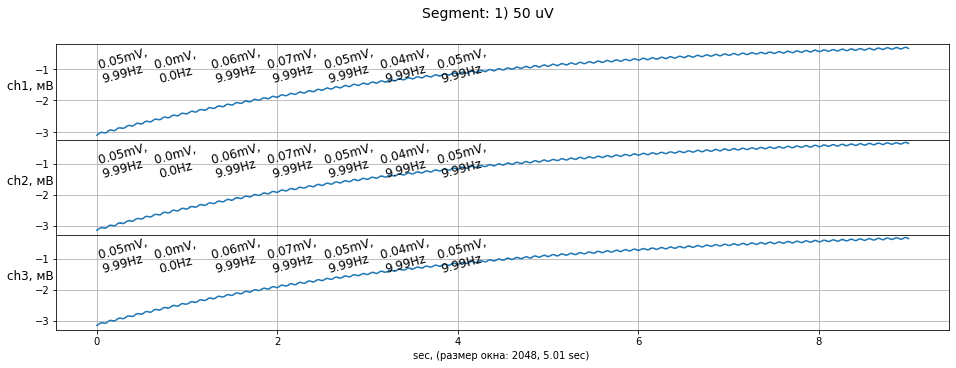

[0.05, 0.05, 0.05]


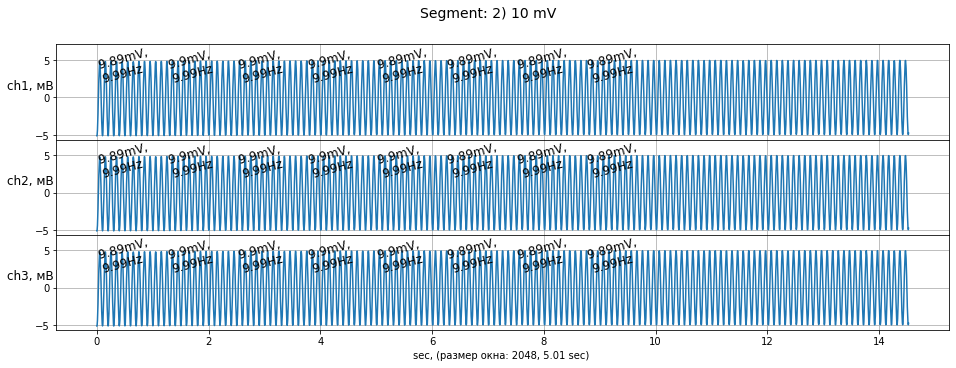

[9.89, 9.9, 9.89]


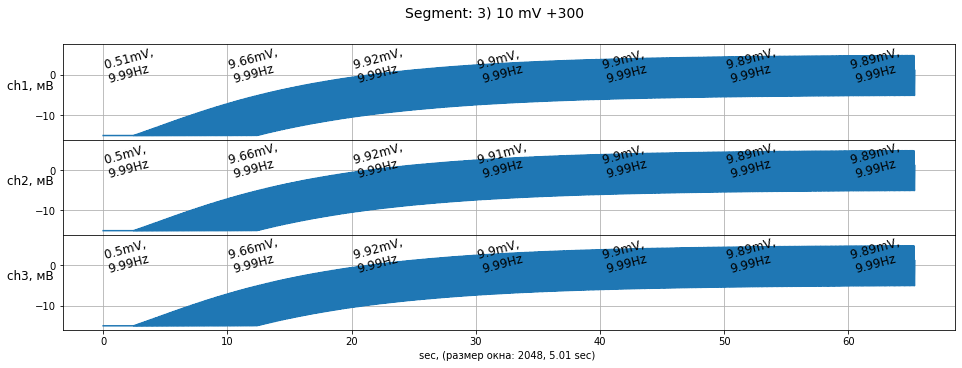

[9.89, 9.89, 9.89]


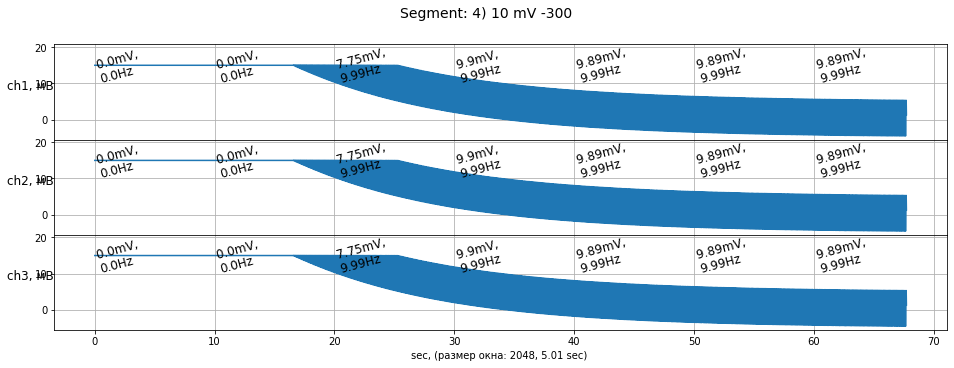

[9.89, 9.89, 9.89]


In [10]:
# Амплитуды
values, spikes = amplitude_test(testing_record, n_seg = 1, peaks_height= 0.03, check_spike=False)
passed_test = min(values) > 0
tests_rezult_pd.loc[1] = [ 'Amp test 50 uV', passed_test  , values, pd.NA]

values, spikes = amplitude_test(testing_record, n_seg = 2)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[2] = [ 'Amp test 10 mV', passed_test  , values, spikes]

values, spikes = amplitude_test(testing_record, n_seg = 3 )
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[3] = [ 'Amp test 10 mV +300 mV', passed_test  , values, spikes]

values, spikes = amplitude_test(testing_record, n_seg = 4)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[4] = [ 'Amp test 10 mV -300 mV', passed_test  , values, spikes]

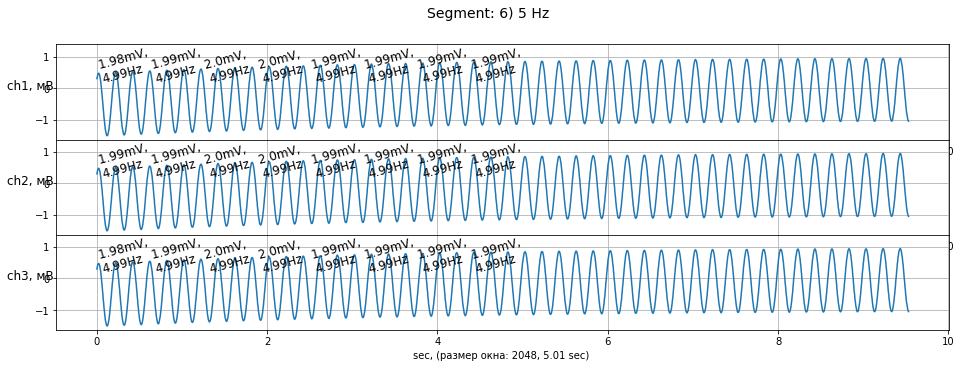

[1.99, 1.99, 1.99]


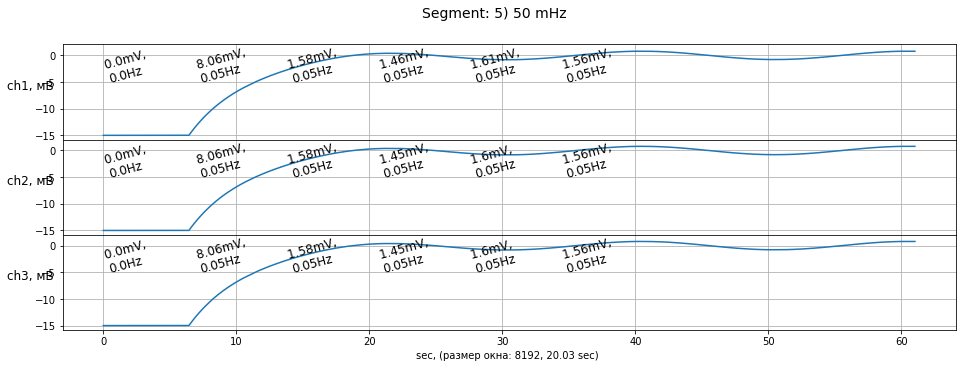

[1.56, 1.56, 1.56]


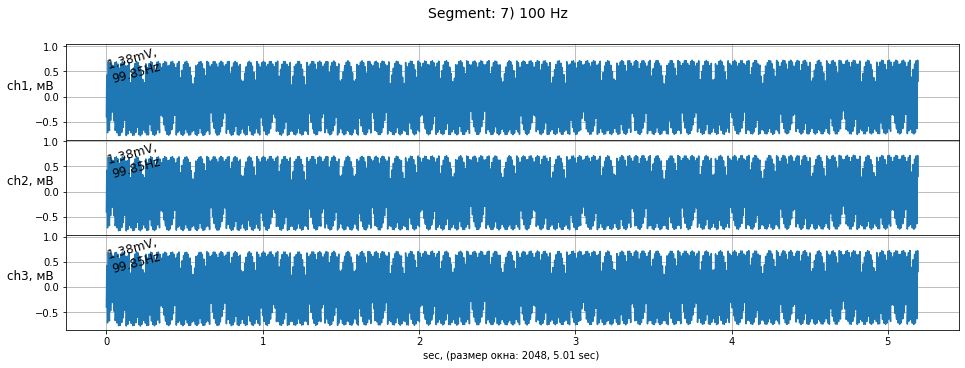

[1.38, 1.38, 1.38]


In [11]:
# Частоты
values, spikes = amplitude_test(testing_record, n_seg = 6)
passed_test = np.prod(np.abs(np.array(values) - 2)< 2*0.05)==1
tests_rezult_pd.loc[6] = [ 'frequency response 5 Hz', passed_test , values, spikes]

values, spikes = amplitude_test(testing_record, n_seg = 5, window_size = 2**13)
passed_test = np.prod(values > np.median(tests_rezult_pd.loc[6][2])*0.7)==1
tests_rezult_pd.loc[5] = [ 'frequency response 50 mHz', passed_test  , values, spikes]

values, spikes = amplitude_test(testing_record, n_seg = 7, check_spike=False)
passed_test = np.prod(values > np.median(tests_rezult_pd.loc[6][2])*0.7)==1
tests_rezult_pd.loc[7] = [ 'frequency response 100 mHz', passed_test  , values, pd.NA]

ch1, max = 1.005 sec, min = 1.002 sec
ch2, max = 1.005 sec, min = 1.002 sec
ch3, max = 1.005 sec, min = 1.002 sec
Прохождение испытания: True


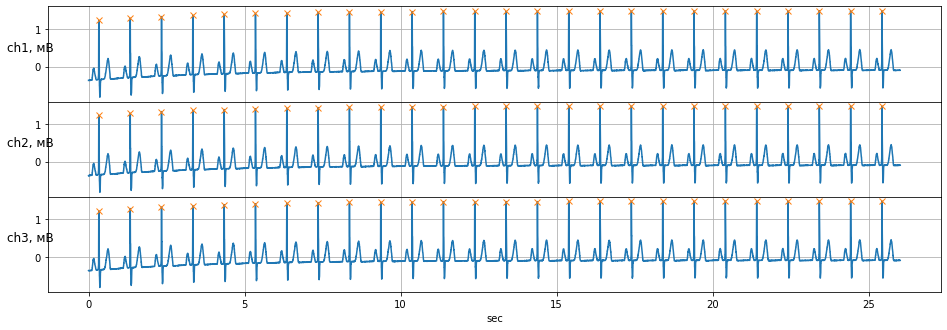

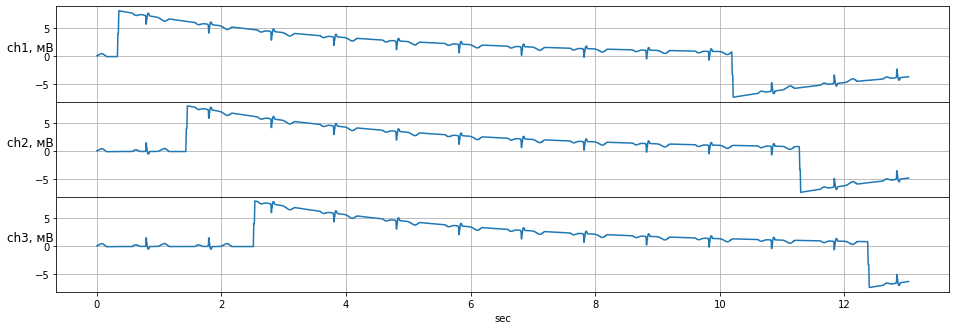

In [12]:
passed_test = ECG_test(testing_record, n_seg = 8)
tests_rezult_pd.loc[8] = [ 'ECG test', passed_test  , pd.NA, pd.NA]

Segment: 10) Доп. ток
ch1, max = 0.78 мВ, min = -0.59 мВ
ch2, max = 0.29 мВ, min = -0.28 мВ
ch3, max = 0.64 мВ, min = -0.28 мВ
Прохождение испытания: True


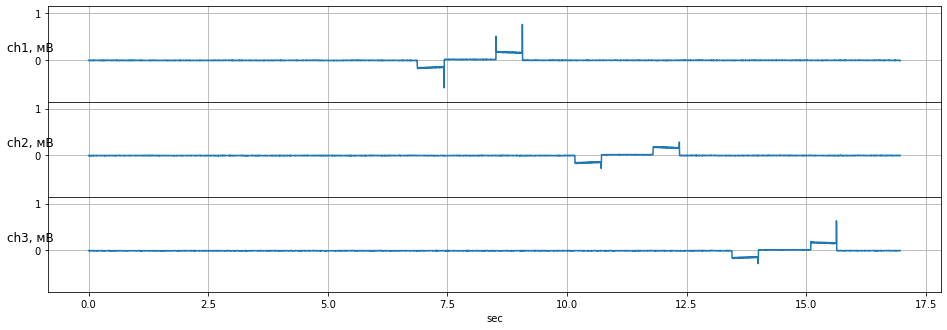

In [13]:
passed_test, values = doptok_test(testing_record, n_seg = 10)
tests_rezult_pd.loc[9] = [ 'Doptok_test', passed_test  , values, pd.NA]

[[264, 143], [168, 132], [268, 188]]


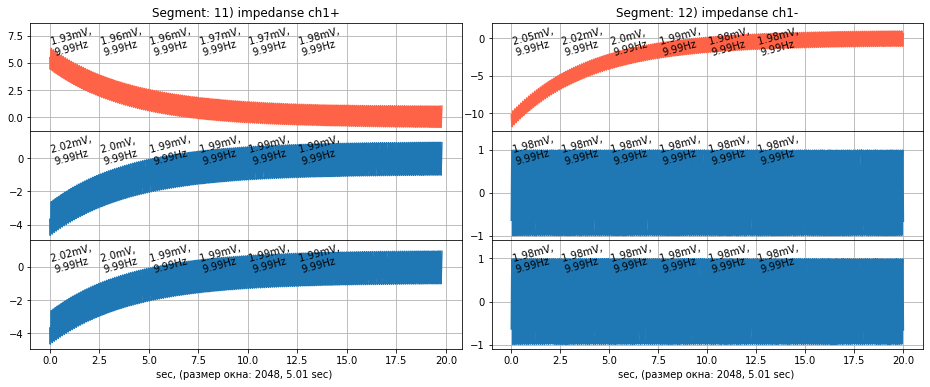

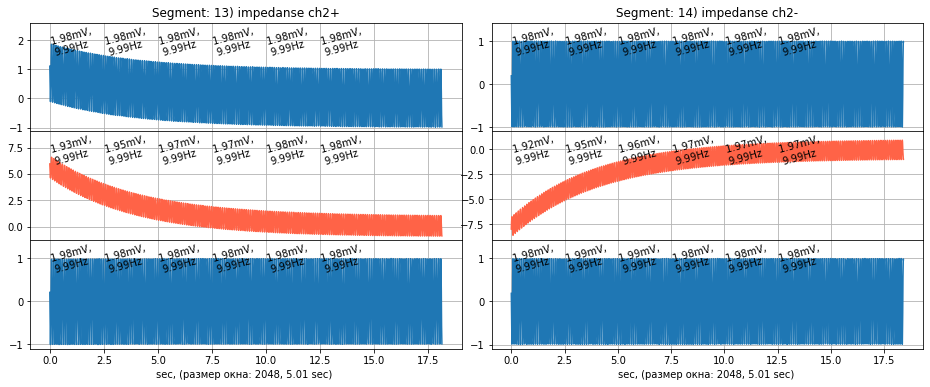

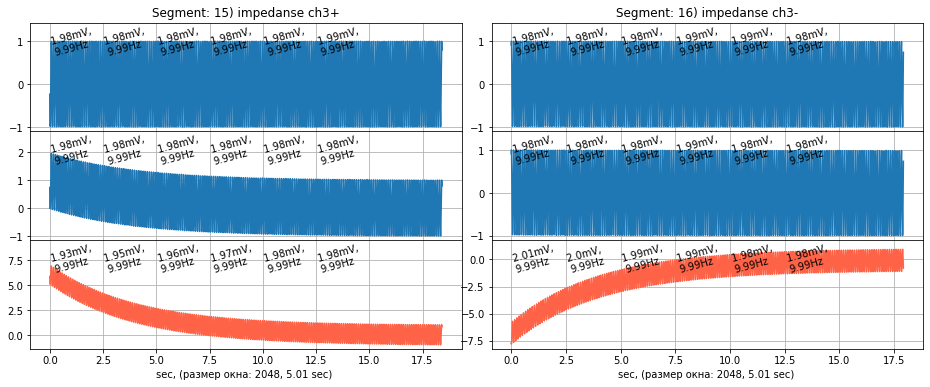

In [14]:
values, spikes = impedanse_test(testing_record, start_n_seg = 11)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[10] = [ 'impedanse_test', passed_test , values, spikes]

[[204, 136], [177, 77], [343, 124]]


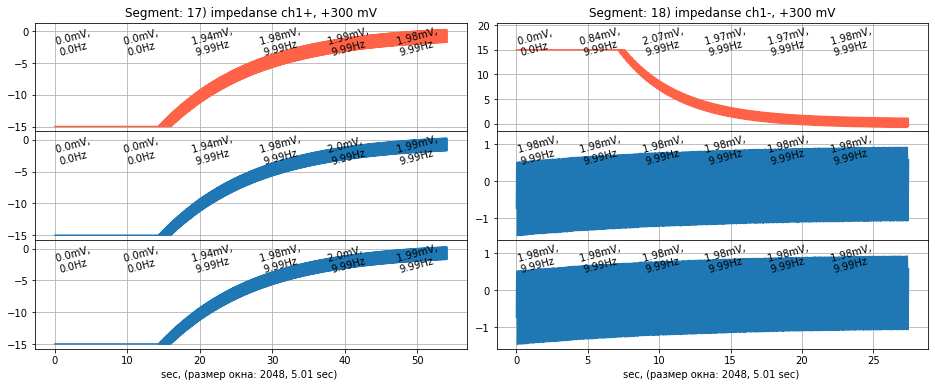

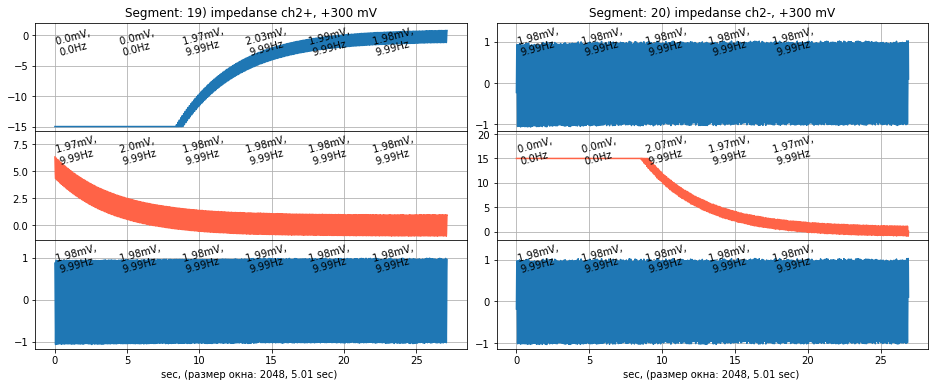

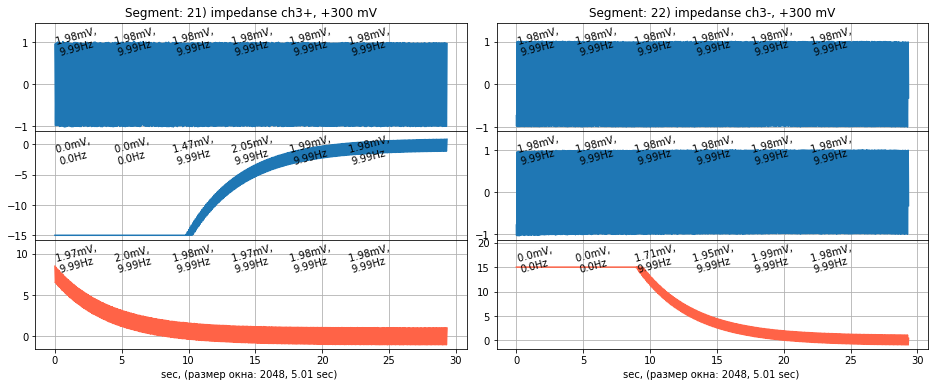

In [15]:
values, spikes = impedanse_test(testing_record, start_n_seg = 17)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[11] = [ 'impedanse_test +300 mV', passed_test , values, spikes]

[[168, 90], [215, 85], [273, 134]]


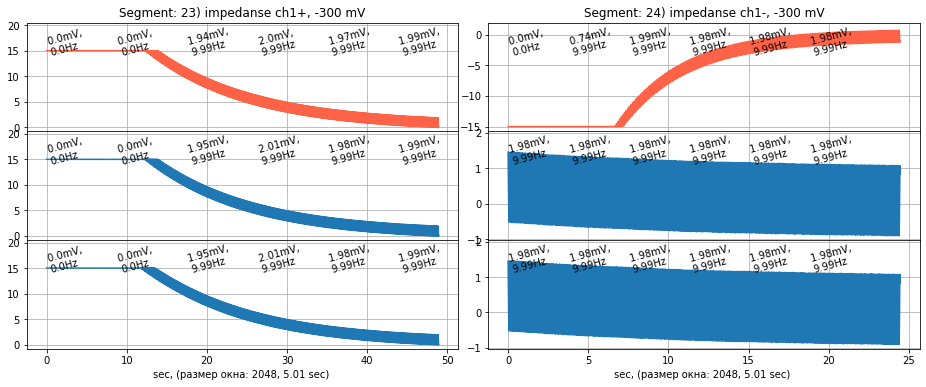

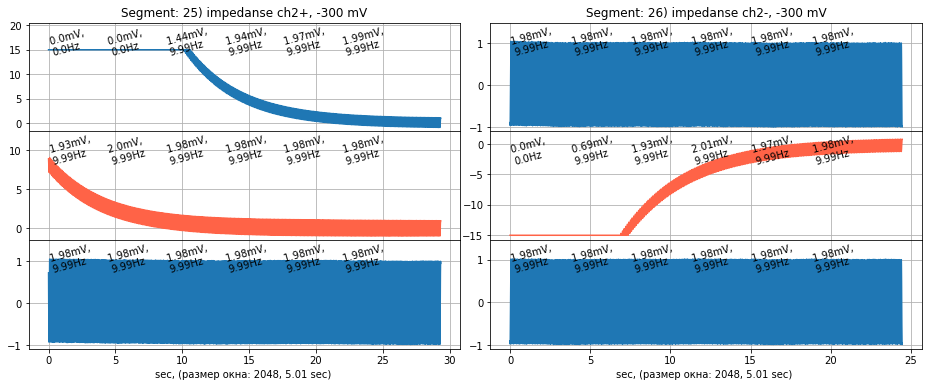

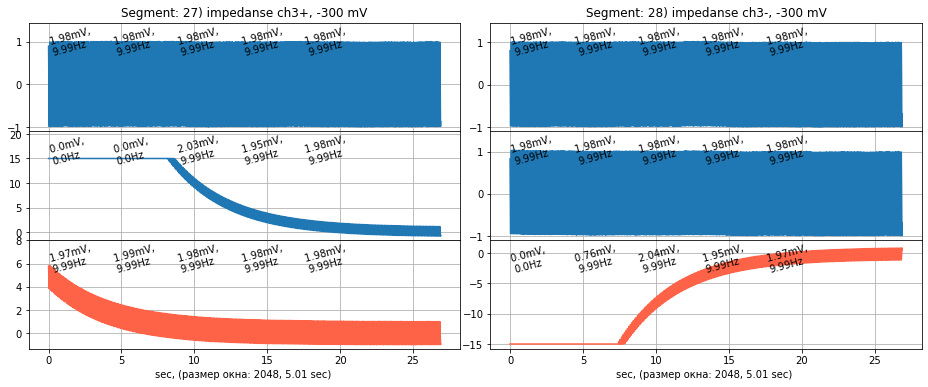

In [16]:
values, spikes = impedanse_test(testing_record, start_n_seg = 23)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[12] = [ 'impedanse_test -300 mV', passed_test  , values, spikes]

## Результаты

In [17]:
tests_rezult_pd

,Test_name,Passed_test,Returned_values,Spikes
0,Nose test,True,"[0.013, 0.013, 0.009]",<NA>
1,Amp test 50 uV,True,"[0.05, 0.05, 0.05]",<NA>
2,Amp test 10 mV,True,"[9.89, 9.9, 9.89]",False
3,Amp test 10 mV +300 mV,True,"[9.89, 9.89, 9.89]",False
4,Amp test 10 mV -300 mV,True,"[9.89, 9.89, 9.89]",False
6,frequency response 5 Hz,True,"[1.99, 1.99, 1.99]",False
5,frequency response 50 mHz,True,"[1.56, 1.56, 1.56]",False
7,frequency response 100 mHz,False,"[1.38, 1.38, 1.38]",<NA>
8,ECG test,True,<NA>,<NA>
9,Doptok_test,True,"[[0.78, -0.59], [0.29, -0.28], [0.64, -0.28]]",<NA>


---
Не прошли

In [18]:
tests_rezult_pd[tests_rezult_pd['Passed_test'] == False]

,Test_name,Passed_test,Returned_values,Spikes
7,frequency response 100 mHz,False,"[1.38, 1.38, 1.38]",<NA>


---
Выбросы

In [19]:
tests_rezult_pd[tests_rezult_pd['Spikes'] == True]

,Test_name,Passed_test,Returned_values,Spikes


In [22]:
time_end = dt.today()
print(f'Время обработки: {(time_end - time_start).seconds//60}:{(time_end - time_start).seconds%60}')
print( 'Время окончания:' ,dt.today().strftime("%H:%M:%S"))

Время обработки: 0:15
Время окончания: 14:13:51
